### Plotting results


In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import History
import pandas as pd
import numpy as np


In [4]:
def plot_training(history: pd.DataFrame):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 3))
    keys = ["root_mean_squared_error", "mean_absolute_error"]

    # training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in keys:
        ax11.plot(history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()

    # validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in keys:
        ax22.plot(history['val_' + metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")

    plt.show()


In [2]:
def plot_training(result: pd.DataFrame):
    y_test = result["real"]
    y_pred = result["predict"]
    plt.scatter(y_pred, y_test, s=1)

    # This will fit the best line into the graph
    plt.xlabel("Predict rating")
    plt.ylabel("Real rating")

    plt.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 2))(np.unique(y_pred)), color='red')


### Loss vs Epochs


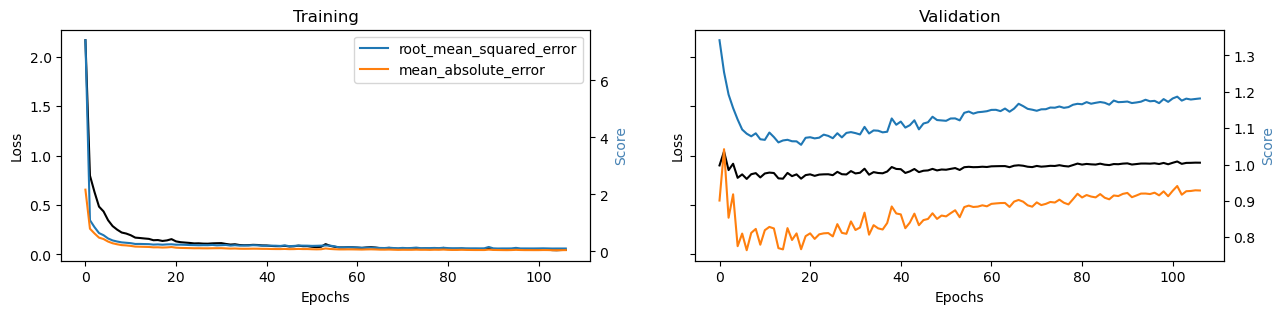

In [5]:
history = pd.read_csv("./history_128_5000.csv")
plot_training(history)


### Real rating vs Predicted rating


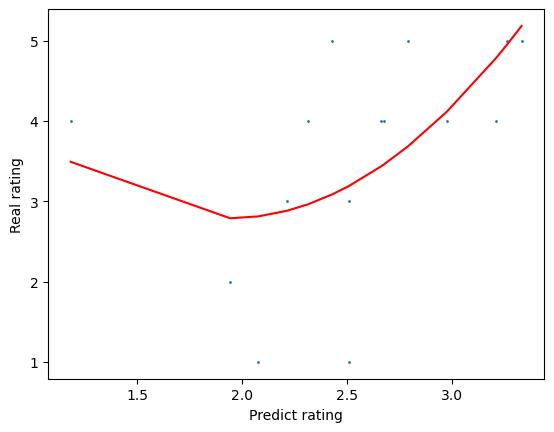

In [4]:
result = pd.read_csv("./result_128_5000.csv")
plot_training(result)


### Full predicted dataset


In [7]:
result_full = pd.read_csv("./result_full_128_5000.csv")
result_full


,asin,reviewerID,overall,image,text,predict
0,6,108,3.0,"[0.07441166692763672, -0.7445438858840012, -0....",[0. 0. 0. 0. 0...,2.997352
1,6,58,5.0,"[0.07441166692763672, -0.7445438858840012, -0....",[0. 0. 0. 0. 0...,2.770384
2,6,86,4.0,"[0.07441166692763672, -0.7445438858840012, -0....",[0. 0. 0. 0. 0...,2.873748
3,6,98,4.0,"[0.07441166692763672, -0.7445438858840012, -0....",[0. 0. 0. 0. 0...,2.787299
4,17,62,5.0,"[0.06371347848051678, -0.8028001537450078, 0.3...",[0. 0. 0. 0. 0...,3.933638
5,6,94,5.0,"[0.07441166692763672, -0.7445438858840012, -0....",[0. 0. 0. 0. 0...,2.667091
6,9,110,5.0,"[-0.6574267348071597, 0.15773104545609362, 0.4...",[0. 0. 0. 0. 0...,3.618888
7,6,82,5.0,"[0.07441166692763672, -0.7445438858840012, -0....",[0. 0. 0. 0.13940173 0...,3.146830
8,12,95,1.0,"[-0.3420395034255608, -0.04232009875566661, 0....",[0. 0. 0. 0. 0...,1.749454
9,8,48,5.0,"[0.38737211490292456, 0.7536210343645535, -1.0...",[0. 0. 0. 0. 0...,3.085939
